In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler




In [4]:
# TODO:
# 1. Loading and scaling the wine dataset
# 2. Performing PCA via SVD
# 3. Creating a 3D scatter plot
# 4. Generating scree plots
# 5. Computing and plotting explained variance
# 6. Plotting total explained variance vs. number of components

2.6538461538461537


In [7]:
def load_data():
    # Load and scale the wine dataset
    
    # Load wine data from sklearn.datasets
    wine = load_wine()
    data = wine.data
    target = wine.target

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data, target, wine.feature_names
    
    pass

In [14]:
def perform_pca(data):
    # Perform PCA using SVD and other necessary computations
    
    # Perform Singular Value Decomposition (SVD)
    U, s, VT = np.linalg.svd(data.T)
    
    # Return the left singular vectors (U), singular values (s), and right singular vectors (VT)
    return U, s, VT
    
    pass


In [77]:
def plot_3d_pca(U, data, target):
    # Create a 3D scatter plot of the first three principal components
    
    k = 3  # number of components to keep
    Uk = U[:, :k]
    x_pca = np.dot(data, Uk)

    fig = plt.figure(figsize=(10, 10))
    temp = fig.add_subplot(projection='3d')
    temp.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=target, cmap='plasma')
    
    #scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=target, cmap='plasma')
    #plt.xlabel('First Principal Component')
    #plt.ylabel('Second Principal Component')
    #plt.zlabel('Third Principal Component')
    temp.set_xlabel('First Principal Component')
    temp.set_ylabel('Second Principal Component')
    temp.set_zlabel('Third Principal Component')
    
    plt.colorbar(temp.scatter, ticks=[0, 1], aspect=80, ax=plt.gca())
    plt.title('PCA of Wine Dataset')
    plt.show()
    
    pass


In [81]:
def create_scree_plot(data):
    # Create a scree plot of the singular values
    
    plt.figure(figsize=(8, 6))
    plt.plot(data)  #plots eigenvalues of order from 1st to 12th
    plt.xlabel('Principle Component Number (ordered)')
    plt.ylabel('Principle Component Size')
    plt.show()
    
    pass

In [82]:
def plot_explained_variance(s):
    # Compute and plot the variance explained by each principal component    
    explained_var = []
    sumx = 0
    #explained_var = np.cumsum(s)/np.sum(s)
    for i in range(len(s)):
        sumx=sumx+s[i]
    for i in range(len(s)):
        explained_var.append(s[i]/sumx)
    print(explained_var)
    
    plt.figure(figsize=(8, 6))
    plt.plot(explained_var)
    plt.xlabel('Principle Component Number (ordered)')
    plt.ylabel('Principle Component Variance')
    plt.show()
    
    pass

In [83]:
def plot_cumulative_variance():
    # Plot the cumulative variance explained
    
    cumulative_var = np.cumsum(s)/np.sum(s)
    
    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_var)
    plt.xlabel('k Principle Components (ordered)')
    plt.ylabel('Cumulative Variance')
    plt.show()
    
    pass

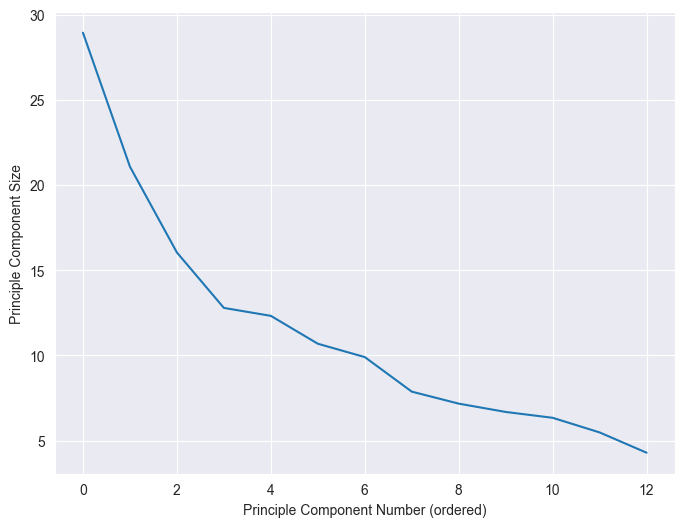

[np.float64(0.1934468965691125), np.float64(0.14091255910064632), np.float64(0.10723527483800664), np.float64(0.08548586477307094), np.float64(0.08237118430039626), np.float64(0.07143222766372945), np.float64(0.0661956836816959), np.float64(0.05264322216290888), np.float64(0.04792933570939922), np.float64(0.04466786492405019), np.float64(0.042373443516618876), np.float64(0.0366345315519489), np.float64(0.028671911208415928)]


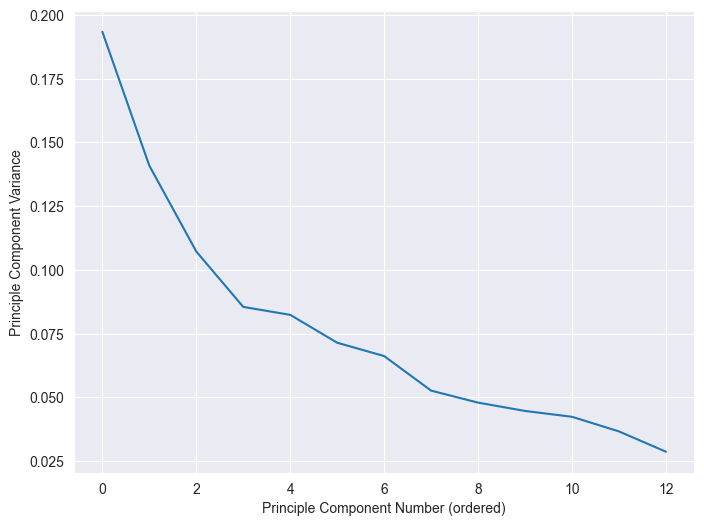

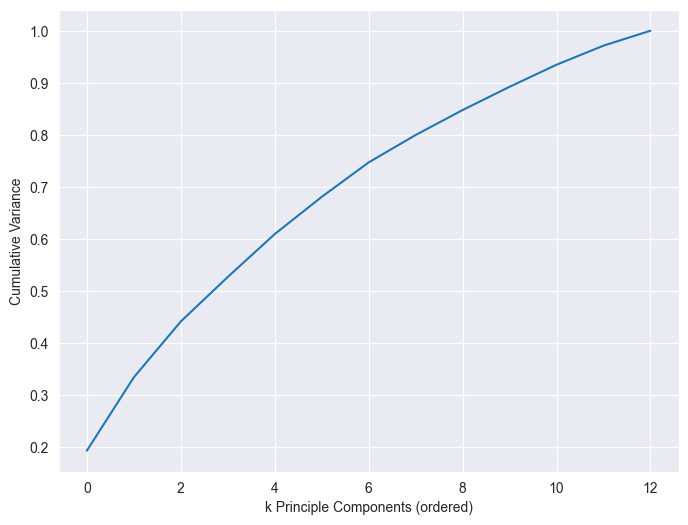

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

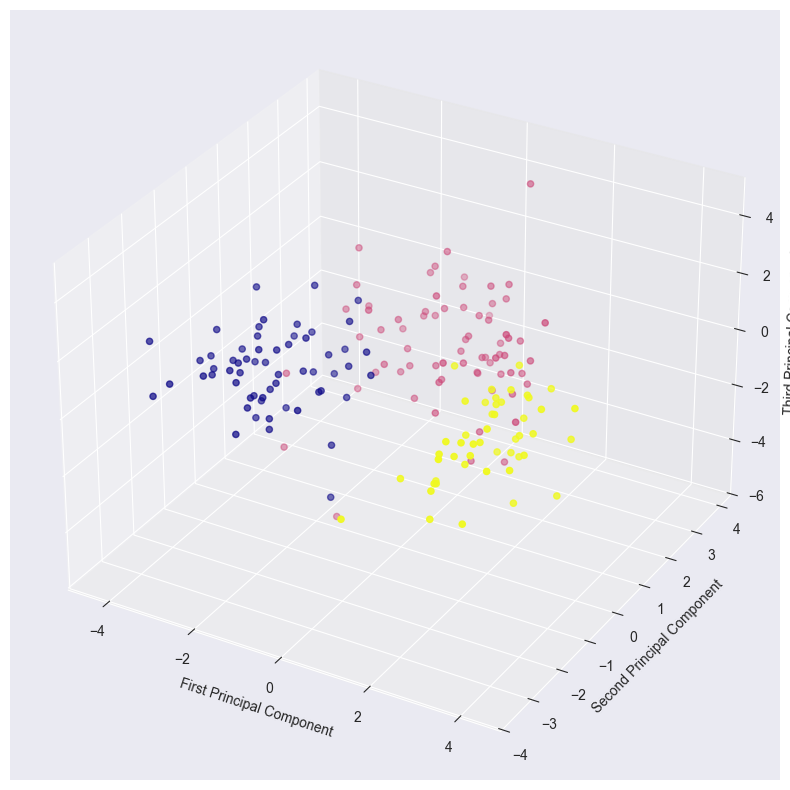

In [84]:

if __name__ == "__main__":
    # Call functions here
    
    #load and scale date
    wine_scaled, wine_target, wine_feature_names = load_data()
    
    #preform PCA and SVD
    U, s, VT = perform_pca(wine_scaled)
    
    #scree plot
    create_scree_plot(s)
    
    #variance plot
    plot_explained_variance(s)
    
    #cumulative variance plot
    plot_cumulative_variance()
    
    #plot first 3 PCAs
    plot_3d_pca(U, wine_scaled, wine_target)
    
    pass

2 b)
I would say that keeping three principal components doesn't change the groupings of the wines that much. It does slightly affect them, as the third demention does impact the groupings, but the impact it has to each grouping is similar to the others. From observing the graph, we see that the blue grouping is slightly higher than the yellow, and that the red grouping lands somewhere in between. So yes, keeping a third principal component does do a better job at seperating the groups.

d)
The best number of principal componenets to keep would be 4. This is because the graph visiably tapers off after the third principal component, making the following eigenvalues have less impact on the output of the PCA function. This is because the smaller the principal component gets, the less impact it has on the final matrix. 

g)
Looking at the various scree plots, it would be best to use 7 principal components. This is because when looking at the last graph (cumulative variance), accounting for the previous estimate of 4 principal components would only accurately depict 60% of the final matrix, with the cumulative variance being just over 0.6 If we take 7 principal components, the cumulative variance would only be 80%, making the final matrix 80% accurate.